# QuantumSim - Grover Search using 3-Qubit Adder
Author: Nico Kuijpers <br>
Date: January 26, 2025

In this notebook, a quantum circuit for a 3-qubit adder is included in a Grover oracle to find all possible combinations
of $3$-bit numbers $a$ and $b$ for which it holds $a + b = S$, $0 \leq S \leq 14$. Although QuantumSim is used in this notebook,
the code can be readily converted to Qiskit.

The $3$-qubit adder is introduced in this notebook from QuantumSim:

https://github.com/nicokuijpers/QuantumSim/blob/main/QuantumSimThreeQubitAdder.ipynb

For an implementation of Grover's algorithm in QuantumSim, we refer to this notebook:

https://github.com/nicokuijpers/QuantumSim/blob/main/QuantumSimGroverAlgorithm.ipynb

In [1]:
from quantumsim import *

## 3-qubit adder
Below python functions *carry()*, *carry_inverse()*, *sum()*, and *three_qubit_adder()* are defined. With these functions, a quantum circuit
can be created to compute the sum of two $3$-bit numbers $a$ and $b$. This circuit will then be used as a part of a Grover oracle to find all possible 
combinations of $3$-bit numbers $a$ and $b$ for which it holds $a + b = S$, $0 \leq S \leq 14$.

### Carry gate
Below, python function *carry()* is defined to extend a quantum circuit with a Carry gate.

In [2]:
def carry(circuit:Circuit, carry_in:int, x:int, y:int, carry_out:int):
    """
    Extends a quantum circuit with a Carry gate. 
    A Carry gate determines the sum of the carry-in bit and bit values x and y.
    The resulting sum will be stored in the qubit containing the y bit.
    The carry-out will be stored in the carry-out bit.

    Parameters:
    circuit (Circuit) : The quantum circuit to be extended
    carry_in (int)    : The qubit containing the carry-in state
    x (int)           : The qubit containing the bit value x
    y (int)           : The qubit containing the bit value y, here the sum x + y (mod 2) will be stored
    carry_out (int)   : The qubit to store the carry-out state. Should be |0>.

    Returns:
    None
    """
    circuit.toffoli(x, y, carry_out)
    circuit.cnot(x, y)
    circuit.toffoli(carry_in, y, carry_out)

### Inverse Carry Gate
Below, python function *carry_inverse()* is defined to extend a quantum circuit with the inverse of the circuit introduced above.

In [3]:
def carry_inverse(circuit:Circuit, carry_in:int, x:int, y:int, carry_out:int):
    """
    Extends a quantum circuit with an inversed version of the Carry gate. 
    A Carry gate determines the sum of the carry-in bit and bit values x and y.
    The resulting sum will be stored in the qubit containing the y bit.
    The carry-out will be stored in the carry-out bit.

    Parameters:
    circuit (Circuit) : The quantum circuit to be extended
    carry_in (int)    : The qubit containing the carry-in state
    x (int)           : The qubit containing the bit value x
    y (int)           : The qubit containing the bit value y, here the sum x + y (mod 2) will be stored
    carry_out (int)   : The qubit to store the carry-out state. Should be |0>.

    Returns:
    None
    """
    circuit.toffoli(carry_in, y, carry_out)
    circuit.cnot(x, y)
    circuit.toffoli(x, y, carry_out)
   

### Sum Gate
Below python function *sum()* is defined to extend a quantum circuit with a Sum gate.

In [4]:
def sum(circuit:Circuit, x:int, y:int, out:int):
    """
    Extends a quantum circuit with a Sum gate. 
    A Sum gate adds bit values x and y to the state of the third qubit.
    |out> --> |out> + |x> + |y> (mod 2)

    Parameters:
    circuit (Circuit) : The quantum circuit to be extended
    x (int)           : The qubit containing the bit value x
    y (int)           : The qubit containing the bit value y
    out (int)         : The qubit to which bit values x and y are added. 

    Returns:
    None
    """
    circuit.cnot(x, out)
    circuit.cnot(y, out)

### 3-Qubit Adder
Using the Carry gate, inverse Carry gate, Sum gate, and a CNOT gate, a $3$-qubit adder can be constructed.
Below, python function *three_qubit_adder()* is defined to extend a quantum circuit with a $3$-qubit adder. 
Calls are made to functions *carry()*, *carry_inverse()*, and *sum()* defined above. 

In [5]:
def three_qubit_adder(circuit:Circuit):
    """
    Extends a quantum circuit with a 3-qubit adder.
    Input x = x0 x1 x2 is the state of qubits q1, q4, q7 (least significant --> most significant)
    Input y = y0 y1 y2 is the state of qubits q2, q5, q8 (least significant --> most significant)
    Output z = x + y = z0 z1 z2 z3 will be the state of q2, q5, q8, q9 (least significant --> most significant)

    Parameters:
    circuit (Circuit) : The quantum circuit to be extended

    Returns:
    None
    """
    # Consistency check: number of qubits mus be at least 10
    if circuit.N < 10:
        raise ValueError("At least 10 qubits are needed for 3-qubit adder")
    
    # Create a 3-qubit adder by extending the circuit with
    # Carry gates, inverse Carry gates, Sum gates, and a CNOT gate
    carry(circuit, 0, 1, 2, 3)
    carry(circuit, 3, 4, 5, 6)
    carry(circuit, 6, 7, 8, 9)
    circuit.cnot(7, 8)
    sum(circuit, 6, 7, 8)
    carry_inverse(circuit, 3, 4, 5, 6)
    sum(circuit, 3, 4 ,5)
    carry_inverse(circuit, 0, 1, 2, 3)
    sum(circuit, 0, 1, 2)

Using the python function *three_qubit_adder()* defined above, a quantum circuit can be created to compute the sum of 
integer values $x$ and $y$, $0 \leq x,y \leq 7$.
The function has as input the $3$-bit representations $x_0 x_1 x_2$ and $y_0 y_1 y_2$, where 
$x_0$ and $y_0$ represent the *least* significant bits and $x_2$ and $y_2$ the *most* significant bits.

Below, python function *create_three_qubit_adder_circuit()* is defined to create a quantum circuit to compute the sum 
of $x$ and $y$ represented by $x_0 x_1 x_2$ and $y_0 y_1 y_2$.

In [6]:
def create_three_qubit_adder_circuit(x0:int, x1:int, x2:int, y0:int, y1:int, y2:int):
    """
    Creates a quantum circuit with a 3-qubit adder.
    Input x = x0 x1 x2 will be the initial state of qubits q1, q4, q7 (least significant --> most significant)
    Input y = y0 y1 y2 will be the initial state of qubits q2, q5, q8 (least significant --> most significant)
    Output z = x + y = z0 z1 z2 z3 can be obtained by measuring the states of q2, q5, q8, q9 (least significant --> most significant)

    Parameters:
    x0, x1, x2 (int): 3-bit representation of input x (least significant --> most significant)
    y0, y1, y2 (int): 3-bit representation of input y (least significant --> most significant)

    Returns:
    Circuit to compute the sum of x and y
    """
    circuit = Circuit(10)
    if x0 == 1:
        circuit.pauli_x(1)
    if x1 == 1:
        circuit.pauli_x(4)
    if x2 == 1:
        circuit.pauli_x(7)
    if y0 == 1:
        circuit.pauli_x(2)
    if y1 == 1:
        circuit.pauli_x(5)
    if y2 == 1:
        circuit.pauli_x(8)
    three_qubit_adder(circuit)
    return(circuit)

### Convert integer value to binary number
Function *convert_to_binary_lsb()* converts an integer value to an array of bits of given length with least significant bit first.

In [7]:
def convert_to_binary_lsb(value:int, nr_bits:int):
    """
    Converts an integer value to a bit array of given length with least significant bit first.

    Parameters:
    value (int)   : Integer value to be converted
    nr_bits (int) : Length of output bit array

    Returns:
    Converted bit array with least significant bit first
    """
    # Convert value to a binary string
    # bin(value): Converts the integer to a binary string with prefix '0b'
    # [2:]: Removes the '0b' prefix
    # zfill(nr_bits): Pads the binary string with leading zeros to ensure it has a length of nr_bits
    binary_string = bin(value)[2:].zfill(nr_bits)

    # Convert the padded binary string into an integer array
    bit_array_msb = [int(bit) for bit in binary_string]

    # Reverse the list to make it LSB first
    bit_array_lsb = bit_array_msb[::-1]
    return bit_array_lsb

### Convert binary number to integer
Function *convert_to_integer_lsb()* converts a binary string to an integer. 
In the binary string, the first bit is the least significant bit.

In [8]:
def convert_to_integer_lsb(binary_string:str) -> int:
    """
    Converts a binary string with least significant bit first to an integer.

    Parameters:
    binary_string (str) : Binary string to be converted

    Returns:
    Converted integer value
    """
    # Reverse the binary string such that the most significant bit becomes first 
    msb_binary_string = binary_string[::-1]

    # Convert the binary string with most significant bit first to integer
    value = int(msb_binary_string, 2)
    return value

## Grover Search
Below python functions *create_grover_oracle()*, *create_grover_operator()*, and *create_grover_circuit()* are defined.
With these functions, a quantum circuit of $10$ qubits can be created to find all possible 
combinations of $3$-bit numbers $a$ and $b$ for which it holds $a + b = S$, $0 \leq S \leq 14$.

### Grover oracle
Below function *create_grover_oracle()* is defined to construct a Grover oracle of $10$ qubits for given required sum $S$, $0 \leq S \leq 14$.

In [9]:
def create_grover_oracle(required_sum:int) -> Circuit:
    """
    Creates a Grover oracle to check wether the sum of two 3-bit input values is equal to the required sum S, 0 <= S <= 14.
    Input x = x0 x1 x2 will be the initial state of qubits q1, q4, q7 (least significant --> most significant)
    Input y = y0 y1 y2 will be the initial state of qubits q2, q5, q8 (least significant --> most significant)
    Output z = x + y = z0 z1 z2 z3 can be obtained by measuring the states of q2, q5, q8, q9 (least significant --> most significant)

    Parameters:
    required_sum (int) : Required sum. Must be at least 0 and at most 14

    Returns:
    Grover oracle circuit
    """
    # Consistency check
    if required_sum < 0 or required_sum > 14:
        raise ValueError("Required sum must be at least 0 and at most 14")
    
    # Qubits containing the binary representation of the sum
    indices = [2, 5, 8, 9]
    
    # Determine the qubits that should be zero
    sum_binary = convert_to_binary_lsb(required_sum, 4)
    zero_inds = [indices[ind] for ind in range(len(sum_binary)) if sum_binary[ind] == 0]

    # Construct a circuit of 10 qubits
    circuit = Circuit(10)

    # Three-qubit adder
    three_qubit_adder(circuit)

    # Apply a multi-controlled Pauli Z operation on the qubits containing the sum
    # Apply Pauli X operations on qubits that should be zero
    # Apply Hadamard operation on target qubit 9
    # Apply a generic Toffoli operation with control qubits 2, 5, 8 and target qubit 9
    # Apply Hadamard operations on target qubit 9
    # Apply Pauli X operations on qubits that should be zero
    for i in zero_inds:
        circuit.pauli_x(i)
    circuit.hadamard(9)
    circuit.generic_toffoli(indices[:-1], 9)
    circuit.hadamard(9)
    for i in zero_inds:
        circuit.pauli_x(i)

    # Reverse three-qubit adder
    circuit_three_qubit_adder = Circuit(10)
    three_qubit_adder(circuit_three_qubit_adder)
    circuit_inverse = circuit_three_qubit_adder.create_inverse_circuit()
    circuit.append_circuit(circuit_inverse)

    return circuit


### Grover operator
Below, function *create_grover_operator()* is defined to create the Grover operator from a given Grover oracle.

In [10]:
def create_grover_operator(oracle:Circuit) -> Circuit:
    """
    Creates a Grover operator from a given Grover oracle.

    Parameters:
    oracle (Circuit) : The Grover oracle

    Returns:
    Grover operator circuit
    """
    grover = Circuit(oracle.N)
    grover.append_circuit(oracle)
    for q in range (grover.N):
        grover.hadamard(q)
    for q in range (grover.N):
        grover.pauli_x(q)
    grover.hadamard(grover.N - 1)
    grover.multi_controlled_pauli_x() 
    grover.hadamard(grover.N - 1)
    for q in range (grover.N):
        grover.pauli_x(q)
    for q in range (grover.N):
        grover.hadamard(q)
    return grover

### Grover circuit
Finally, function *create_grover_circuit()* is defined to create the Grover circuit. This function has as input parameters *required_sum*, and *nr_iterations*.
The latter determines how many times the Grover operator is repeated in the Grover circuit. 
Using Hadamard gates, the input qubits are brought into superposition. The remaining qubits have initial state $|0\rangle$.

In [11]:
def create_grover_circuit(required_sum:int, nr_iterations:int) -> Circuit:
    """
    Creates a Grover circuit to find a possible combination of two 3-bit input values for which holds that the sum is equal to the required sum.
    Input x = x0 x1 x2 will be the initial state of qubits q1, q4, q7 (least significant --> most significant)
    Input y = y0 y1 y2 will be the initial state of qubits q2, q5, q8 (least significant --> most significant)
    Output z = x + y = z0 z1 z2 z3 can be obtained by measuring the states of q2, q5, q8, q9 (least significant --> most significant)

    Parameters:
    required_sum (int) : Required sum. Must be at least 0 and at most 14
    nr_iterators (int) : Number of times the Grover operator will repeated in the Grover circuit

    Returns:
    Grover circuit
    """
    # Consistency check
    if required_sum < 0 or required_sum > 14:
        raise ValueError("Required sum must be at least 0 and at most 14")

    # Create the Grover oracle
    oracle = create_grover_oracle(required_sum)

    # Create the Grover operator
    grover_operator = create_grover_operator(oracle)

    # Create the Grover circuit
    circuit = Circuit(oracle.N)

    # Apply Hadamard gates on the input qubits, but not on the other qubits
    # The input qubits are the qubits having the input values x0, x1, x2, y0, y1, and y2
    input_qubits = [1,2,4,5,7,8]
    for q in input_qubits:
        circuit.hadamard(q)
    
    # Repeat the Grover operator
    for i in range(nr_iterations):
        circuit.append_circuit(grover_operator)

    return circuit

## Example
In the example below, Grover's search algorithm is applied to find all possible inputs $a$ and $b$, $0 \leq a, b < 8$ for which it holds $a + b = S$.

The optimal number of iterations $k_{\text{opt}}$ is defined by

$k_{\text{opt}} = \left\lfloor \frac{\pi}{4} \sqrt{\frac{N}{M}} \right\rfloor$, 

where $N$ is the number of possible inputs and $M$ is the number of possible solutions.

Since $0 \leq a, b < 8$, there are $8 \times 8 = 64$ possible inputs, so $N = 64$.

If there were no upper limits for $a$ and $b$, the number of possible solutions for sum $S$ would be $S + 1$.

However, both $a$ and $b$ are at most 7. This limits the number of possible solutions to $8$.
Hence, the number of possible solutions $M$ for given $S$, $0 \leq S \leq 14$, is defined by

$
M =
\begin{cases} 
S + 1 & \text{if } S \leq 7 \\
15 - S & \text{if } S > 7
\end{cases}
$

Below, a Grover circuit is created for required sum $S=9$. In this case, the optimal number of iterations $k_{\text{opt}}$ is $2$.

In [12]:
import math

# Determine number of possible inputs and possible solutions
required_sum = 9
nr_possible_inputs = 2**6
if required_sum <= 7:
    nr_possible_solutions = required_sum + 1
else:
    nr_possible_solutions = 15 - required_sum


# Determine optimal number of iterations 
nr_iterations = max(1, math.floor((math.pi / 4) * math.sqrt((nr_possible_inputs/nr_possible_solutions))))

# Print 
print(f"Required sum                 : {required_sum}")
print(f"Number of possible inputs    : {nr_possible_inputs}")
print(f"Number of possible solutions : {nr_possible_solutions}")
print(f"Optimal number of iterations : {nr_iterations}")

# Create the Grover circuit
circuit = create_grover_circuit(required_sum, nr_iterations)

Required sum                 : 9
Number of possible inputs    : 64
Number of possible solutions : 6
Optimal number of iterations : 2


Below, the circuit is executed and 20000 measurements are performed.

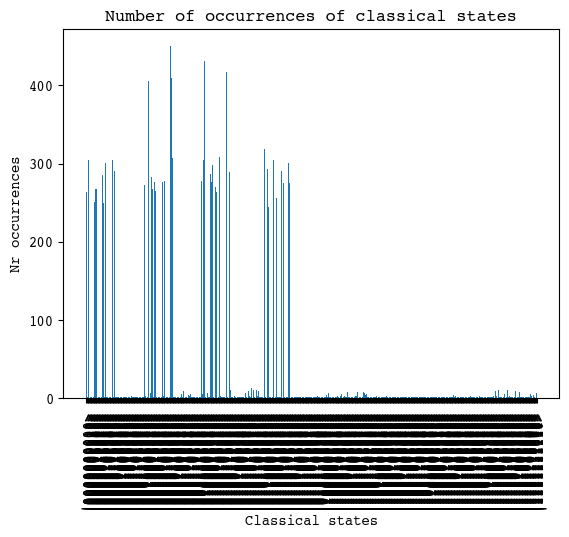

In [13]:
result = QuantumUtil.measure_circuit(circuit, nr_measurements=20000)
QuantumUtil.histogram_of_classical_states(result)

## Testing
Below, function *test_grover_circuit()* is defined to create a Grover circuit, execute it, and measure the results. 
A histogram of the results with valid input is plotted if parameter *plot_histogram* is True.

From the resulting measurements a set with the $M$ most common occurrences of result strings is
created, where $M$ is the number of possible solutions defined above.
If $S$ is the required sum, then all result strings in the most common set should have input
qubits representing $a$ and $b$ for which it holds $a + b = S$.

The corresponding additions of the most common results are printed and the total number of violations is counted.
Finally, the list of solutions found by Grover's search algorithm is printed. 
Note that this list is NOT corrected for any violations found during the test.

In [14]:
import re

def test_grover_circuit(required_sum:int, nr_measurements:int, plot_histogram:bool=False, nr_iterations:int=None):
    """
    Tests a Grover circuit to find all possible combinations of two 3-bit input values for which it holds that the sum is equal to the required sum.
    Input x = x0 x1 x2 will be the initial state of qubits q1, q4, q7 (least significant --> most significant)
    Input y = y0 y1 y2 will be the initial state of qubits q2, q5, q8 (least significant --> most significant)
    Output z = x + y = z0 z1 z2 z3 can be obtained by measuring the states of q2, q5, q8, q9 (least significant --> most significant)

    Parameters:
    required_sum (int)    : Required sum. Must be at least 0 and at most 14
    nr_measurements (int) : Number of measurements after execution
    plot_histogram (bool) : Plot histogram of result strings having valid input strings
    nr_iterations (int)   : Number of times the Grover operator will repeated in the Grover circuit

    Returns:
    None
    """
    # Determine number of possible inputs and possible solutions
    nr_possible_inputs = 2**6
    if required_sum <= 7:
        nr_possible_solutions = required_sum + 1
    else:
        nr_possible_solutions = 15 - required_sum

    # Determine optimal number of iterations
    opt_nr_iterations = max(1, math.floor((math.pi / 4) * math.sqrt((nr_possible_inputs/nr_possible_solutions))))

    if nr_iterations == None:
        nr_iterations = opt_nr_iterations

    # Print 
    print(f"Required sum                 : {required_sum}")
    print(f"Number of possible inputs    : {nr_possible_inputs}")
    print(f"Number of possible solutions : {nr_possible_solutions}")
    print(f"Optimal number of iterations : {opt_nr_iterations}")
    print(f"Number of iterations         : {nr_iterations}")
    
    # Create a Grover circuit
    circuit = create_grover_circuit(required_sum, nr_iterations)

    # Execute the Grover circuit and measure multiple times
    result = QuantumUtil.measure_circuit(circuit, nr_measurements=nr_measurements)

    # Plot a histogram of the results satisfying the pattern |0..0..0..0>
    # where . can be either 0 or 1. These are all valid input strings.
    if plot_histogram:
        pattern = r"\|0..0..0..0>"
        valid_input = [s for s in result if re.fullmatch(pattern, s) ]
        QuantumUtil.histogram_of_classical_states(valid_input)

    # Count occurrences of each string in result
    counter = Counter(result)

    # Get the nr_possible_solutions most common strings as a list of tuples (string, count)
    most_common_strings = counter.most_common(nr_possible_solutions)

    # Get nr_possible_solutions most common strings only
    most_common_strings_only = [item[0] for item in most_common_strings]

    # Convert most_common_strings_only to a set for faster lookups
    most_common_set = set(most_common_strings_only)

    # All strings in most_common_strings should fulfil the requirement
    indices_input_a = [1,4,7]
    indices_input_b = [2,5,8]
    nr_violations_common = 0
    for string in most_common_strings_only:
        binary_string_a = ''.join(string[i+1] for i in indices_input_a)
        binary_string_b = ''.join(string[i+1] for i in indices_input_b)
        a = convert_to_integer_lsb(binary_string_a)
        b = convert_to_integer_lsb(binary_string_b)
        print(f"Result = {string}, a = {a}, b = {b}, and a + b = {a + b}")
        if a + b != required_sum:
            nr_violations_common += 1

    # Print the solutions
    print(f"Number of violations in set of most common strings is {nr_violations_common}")
    print("Solutions found (not corrected for violations):")
    print(sorted(most_common_set))

Below, a Grover circuit is tested for required sum $S=7$. The number of possible combinations for which $a + b = 7$ is equal to $8$.
A histogram of resulting strings representing valid inputs is plotted. When inspecting the histogram, it can be observed that $8$ 
result strings occur more frequently than the other result strings.
These $8$ result strings represent the $8$ possible combinations of $a$ and $b$ for which holds $a + b = 7$.

Required sum                 : 7
Number of possible inputs    : 64
Number of possible solutions : 8
Optimal number of iterations : 2
Number of iterations         : 2


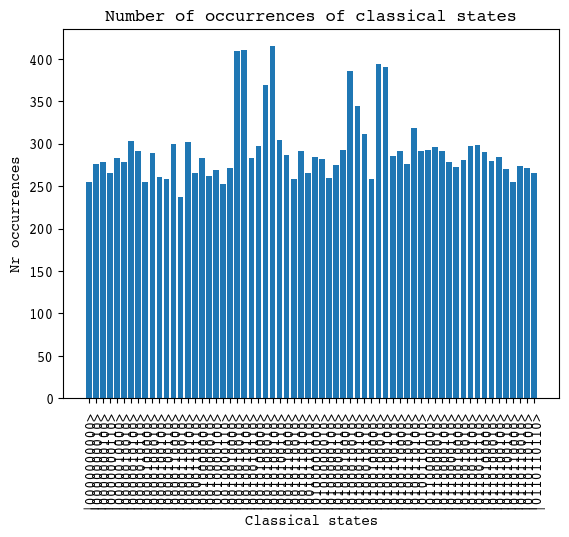

Result = |0010100100>, a = 6, b = 1, and a + b = 7
Result = |0010010100>, a = 4, b = 3, and a + b = 7
Result = |0010010010>, a = 0, b = 7, and a + b = 7
Result = |0100100010>, a = 3, b = 4, and a + b = 7
Result = |0100100100>, a = 7, b = 0, and a + b = 7
Result = |0100010010>, a = 1, b = 6, and a + b = 7
Result = |0010100010>, a = 2, b = 5, and a + b = 7
Result = |0100010100>, a = 5, b = 2, and a + b = 7
Number of violations in set of most common strings is 0
Solutions found (not corrected for violations):
['|0010010010>', '|0010010100>', '|0010100010>', '|0010100100>', '|0100010010>', '|0100010100>', '|0100100010>', '|0100100100>']


In [15]:
test_grover_circuit(required_sum=7, nr_measurements=20000, nr_iterations=2, plot_histogram=True)

Uncomment the code below to test the Grover circuit for all $S$, $0 \leq S \leq 14$.
Note that running this test may take some time.

In [17]:
# for i in range(15):
#    test_grover_circuit(required_sum=i, nr_measurements=20000, nr_iterations=None, plot_histogram=False)

Required sum                 : 0
Number of possible inputs    : 64
Number of possible solutions : 1
Optimal number of iterations : 6
Number of iterations         : 6
Result = |0000000000>, a = 0, b = 0, and a + b = 0
Number of violations in set of most common strings is 0
Solutions found (not corrected for violations):
['|0000000000>']
Required sum                 : 1
Number of possible inputs    : 64
Number of possible solutions : 2
Optimal number of iterations : 4
Number of iterations         : 4
Result = |0010000000>, a = 0, b = 1, and a + b = 1
Result = |0100000000>, a = 1, b = 0, and a + b = 1
Number of violations in set of most common strings is 0
Solutions found (not corrected for violations):
['|0010000000>', '|0100000000>']
Required sum                 : 2
Number of possible inputs    : 64
Number of possible solutions : 3
Optimal number of iterations : 3
Number of iterations         : 3
Result = |0000010000>, a = 0, b = 2, and a + b = 2
Result = |0110000000>, a = 1, b = 1, and